In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('heart-disease')
jovian.set_colab_id('1PuhiVHfEqfRF1dSLawczjr-HzwNYNR7I')

# new

Use the "Run" button to execute the code.

##Downloading the data

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="heart-disease")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/heart-disease


'https://jovian.ai/sakshatpats/heart-disease'

In [ ]:
!pip install numpy pandas matplotlib seaborn --quiet

In [ ]:
!pip install jovian opendatasets xgboost graphviz scikit-learn plotly --upgrade --quiet

     |████████████████████████████████| 166.7 MB 18 kB/s 
     |████████████████████████████████| 22.3 MB 10.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.4 MB/s 


In [ ]:
import os
import opendatasets as od
import pandas as pd

In [ ]:
od.download('https://www.kaggle.com/ronitf/heart-disease-uci')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sakshatpatil
Your Kaggle Key: ··········


100%|██████████| 3.40k/3.40k [00:00<00:00, 2.22MB/s]

In [ ]:
os.listdir('heart-disease-uci')

['heart.csv']

In [ ]:
heart_df = pd.read_csv('./heart-disease-uci/heart.csv', low_memory=False)


In [ ]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##Cleaning the data and Preprocessing

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

##Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(heart_df, test_size=0.2, random_state=42)

In [ ]:
input_col = list(heart_df.drop(['target'], axis=1).columns.values)

In [ ]:
input_col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
target_col='target'

In [ ]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()

##Scaling numeric values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(heart_df[input_col])

MinMaxScaler()

In [ ]:
train_inputs = scaler.transform(train_inputs)
val_inputs = scaler.transform(val_inputs)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/heart-disease


'https://jovian.ai/sakshatpats/heart-disease'

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

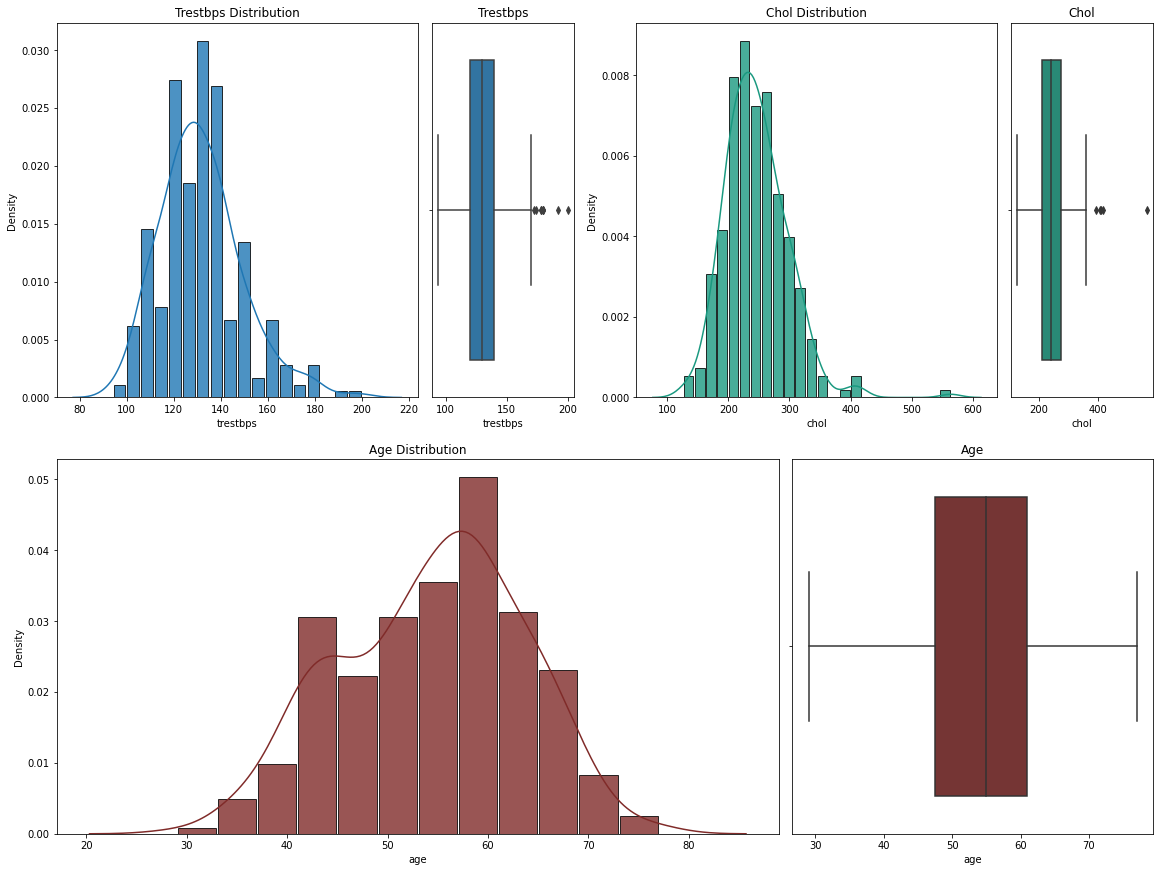

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=2, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')#Blood Pressure

sns.distplot(heart_df['trestbps'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8})

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(heart_df['trestbps'], orient='v')
#------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(heart_df['chol'],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=(0.1, 0.6, 0.5))

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(heart_df['chol'], orient='v', color=(0.1, 0.6, 0.5))
#------------------------------------------------------------------------------------#
ax5 = fig.add_subplot(grid[1, :4])

ax5.set_title('Age Distribution')

sns.distplot(heart_df['age'],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=(0.50, 0.168, 0.160))

ax55 = fig.add_subplot(grid[1, 4:])

ax55.set_title('Age')

sns.boxplot(heart_df['age'], orient='h', color=(0.50, 0.168, 0.160))



<Figure size 1152x720 with 0 Axes>

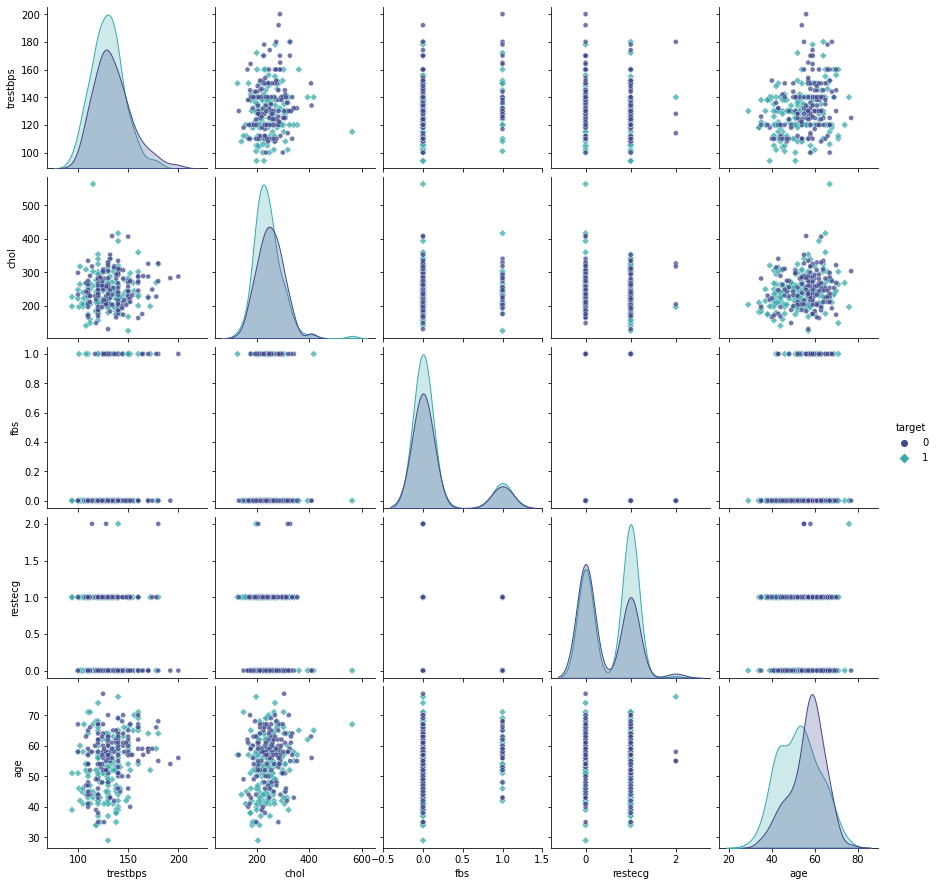

In [ ]:
plt.figure(figsize=(16, 10))
sns.pairplot(heart_df[['trestbps','chol','fbs','restecg','age','target']], hue='target',palette='mako',
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

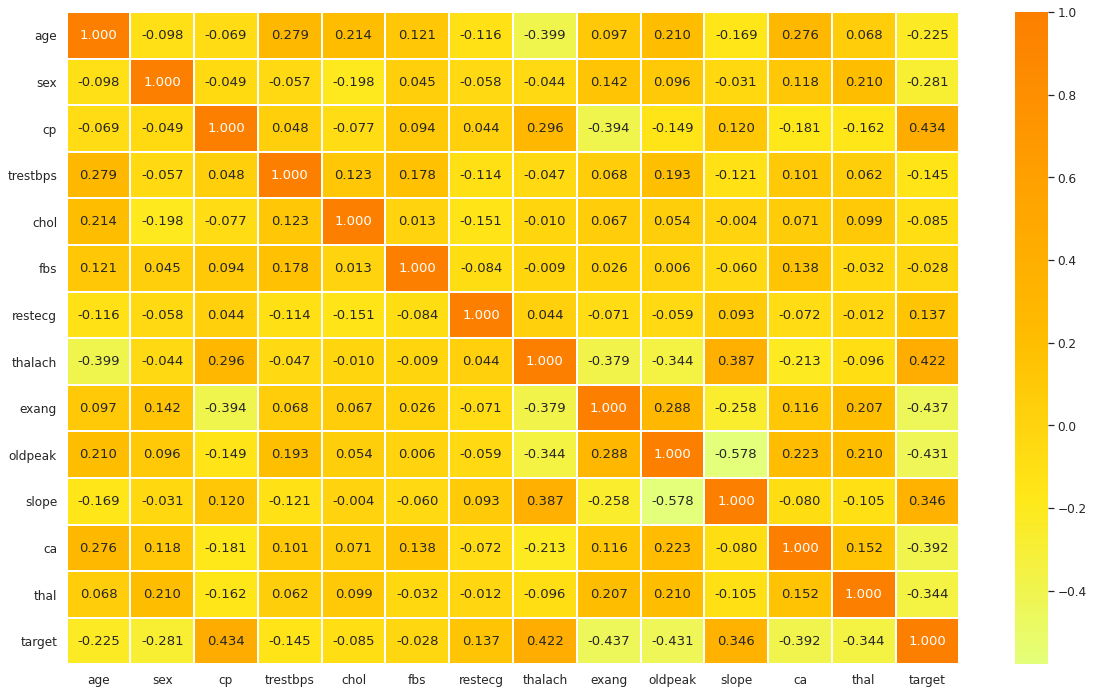

In [ ]:
sns.set(font_scale=1.1)
correlation_train = heart_df.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

In [ ]:
fig = px.scatter_3d(heart_df, x='chol', y='thalach', z='age', size='oldpeak',
              color='target', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/heart-disease


'https://jovian.ai/sakshatpats/heart-disease'

## **SVM Model**

In [ ]:
from sklearn import svm

In [ ]:
def test_paramsvm(**params):
    test_svm = svm.SVC(kernel='rbf', random_state=42, **params)
    test_svm.fit(train_inputs, train_targets)
    train_accuracy = test_svm.score(train_inputs, train_targets)
    val_accuracy = test_svm.score(val_inputs, val_targets)
    print('Train Accuracy: {}, Validation Accuracy: {}'.format(train_accuracy, val_accuracy))

In [ ]:
mdl = svm.SVC(kernel='rbf')
mdl.fit(train_inputs, train_targets)

SVC()

In [ ]:
train_preds = mdl.predict(train_inputs)


In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

rmse(train_preds, train_targets)

0.34015067152490375

In [ ]:
mdl.score(test_inputs, val_targets) ##Mean accuracy

0.8360655737704918

In [ ]:
test_paramsvm()

Train Accuracy: 0.8842975206611571, Validation Accuracy: 0.8360655737704918


## **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def test_paramrf(**params):
    test_rf = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    test_rf.fit(train_inputs, train_targets)
    train_accuracy = test_rf.score(train_inputs, train_targets)
    val_accuracy = test_rf.score(val_inputs, val_targets)
    print('Train Accuracy: {}, Validation Accuracy: {}'.format(train_accuracy, val_accuracy))

In [ ]:
test_paramrf()

Train Accuracy: 0.9190901703800787, Validation Accuracy: 0.5303197198275863


In [ ]:
test_paramrf(n_estimators=80)

Train Accuracy: 0.9189080068289991, Validation Accuracy: 0.5483029700969828


## **XGBoost**





In [ ]:
from xgboost import XGBRegressor

In [ ]:
def test_paramxg(**params):
    test_xg = XGBRegressor(n_jobs=-1, random_state=42, **params)
    test_xg.fit(train_inputs, train_targets)
    train_accuracy = test_xg.score(train_inputs, train_targets)
    val_accuracy = test_xg.score(val_inputs, val_targets)
    print('Train Accuracy: {}, Validation Accuracy: {}'.format(train_accuracy, val_accuracy))

In [ ]:
test_paramxg()

Train Accuracy: 0.9999931681874697, Validation Accuracy: 0.46993808050509733


In [ ]:
test_paramxg(n_estimators=20,max_depth=2)

Train Accuracy: 0.7000315101575987, Validation Accuracy: 0.49429048684231147


In [ ]:
test_paramxg(n_estimators=20,max_depth=2, learning_rate=0.16)

Train Accuracy: 0.6345261913587916, Validation Accuracy: 0.5010854887265621


In [ ]:
test_paramxg(n_estimators=30,max_depth=2, learning_rate=0.155)

Train Accuracy: 0.6620032688864317, Validation Accuracy: 0.49085108332965666


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sakshatpats/heart-disease


'https://jovian.ai/sakshatpats/heart-disease'